# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [31]:
import pandas as pd

# Dictionary med farver for partierne
party_colors = {
    "Socialdemokratiet" : "#B32722",
    "Radikale Venstre" : "#713280",
    "Det Konservative Folkeparti" : "#9EBA27",
    "Nye Borgerlige" : "#054F5C",
    "Socialistisk Folkeparti" : "#DC0878",
    "Liberal Alliance" : "#20C6CF",
    "Kristendemokraterne" : "#BABABA",
    "Moderaterne" : "#6C39E5",
    "Dansk Folkeparti" : "#F3CD41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti" : "#00E66A",
    "Venstre" : "#016697",
    "Danmarksdemokraterne" : "#89C3FF",
    "Enhedslisten" : "#ED8019",
    "Alternativet" : "#2B8F39",
    "Løsgænger" : "#cdcdcd"
}

# Indlæs spørgsmålene fra begge medier
alldata = pd.read_excel("alldata.xlsx")
alldata_info = {
    "shape": alldata.shape,
    "columns": alldata.columns,
    "preview": alldata.iloc[:5, :10]
}

alldata_info

{'shape': (867, 53),
 'columns': Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
        '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
        '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
        '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
        '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
        'alder'],
       dtype='object'),
 'preview':    530  531  533  534  535  537  538  540  541  543
 0   -1   -2    1   -2    2    1   -2    1    1    2
 1    2    2   -1   -2   -1   -2    1   -2    2   -2
 2    2    1   -2   -2    1   -2    1   -1    1   -1
 3    2    1   -2   -1    1    1    1    1    1   -2
 4    1    1   -2    2   -2    1   -2    1    2   -2}

In [32]:
import numpy as np

# Lav kopi så originalen forbliver intakt
data = alldata.copy()

# Udtræk alle spørgsmålskolonner: enten helt numeriske eller formater som 1a–12b
question_cols = [col for col in data.columns if isinstance(col, (int, np.integer)) or (isinstance(col, str) and col.strip().endswith(('a', 'b')) and col[0].isdigit())]

# Undersøg mængden af NaN i disse kolonner
nan_counts = data[question_cols].isna().sum().sort_values(ascending=False)
nan_summary = {
    "total_questions": len(question_cols),
    "total_candidates": data.shape[0],
    "questions_with_nans": (nan_counts > 0).sum(),
    "candidates_with_any_nan": data[question_cols].isna().any(axis=1).sum(),
    "mean_nan_per_candidate": data[question_cols].isna().sum(axis=1).mean(),
    "top_10_questions_with_most_nans": nan_counts.head(10)
}

nan_summary


{'total_questions': 24,
 'total_candidates': 867,
 'questions_with_nans': np.int64(0),
 'candidates_with_any_nan': np.int64(0),
 'mean_nan_per_candidate': np.float64(0.0),
 'top_10_questions_with_most_nans': 1a    0
 1b    0
 2a    0
 2b    0
 3a    0
 3b    0
 4a    0
 4b    0
 5a    0
 5b    0
 dtype: int64}

Der er ingen NaN-værdier i spørgsmålskolonnerne – alle 867 kandidater har besvaret alle 24 DR-spørgsmål. Det betyder, vi ikke behøver droppe nogen rækker eller konvertere værdier endnu, da 0 rent faktisk kan betyde "neutral" i skalaen fra -2 til 2.

### Find de spørgsmål med størst uenighed
Spørgsmål hvor kandidaterne virkelig er uenige → disse har stor indflydelse på at placere folk forskelligt. Jeg brugte standardafvigelse som mål.

Jeg analyserede spørgsmålene ud fra deres evne til at differentiere kandidater — både via standardafvigelse og ved at se hvilke spørgsmål der typisk trækker kandidater i hver sin retning. Fx skabte spørgsmål 10b, 6b, 6a, 11b meget uenighed, alle sammen med en spredning på ca. 1.6 og er derfor vigtige for, hvor kandidaterne lander i det politiske landskab.

Når vi kigger i dataene kan vi se at spørgsmål 10b, 6b, 6a og 11b omhandler:
- 10b = Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.
- 6b = Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.
- 6a = Den danske udlændingepolitik er for stram.
- 11b = Det bør undersøges, om Mette Frederiksen kan stilles for en rigsret som konsekvens af hendes håndtering af Mink-sagen.

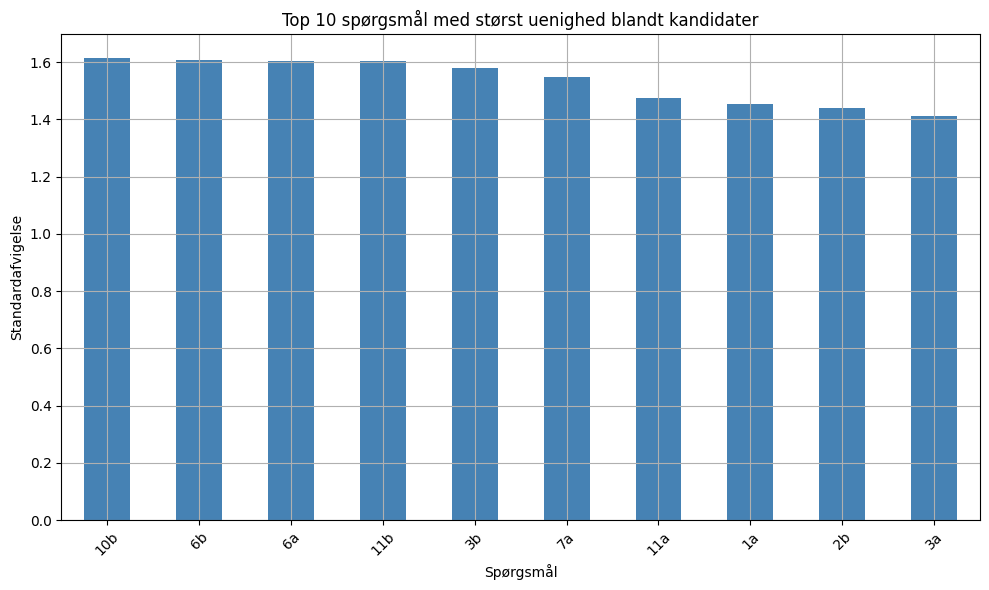

In [33]:
import matplotlib.pyplot as plt

# Beregn standardafvigelse (spredning) pr. spørgsmål
std_per_question = data[question_cols].std().sort_values(ascending=False)

# Top 10 spørgsmål med højest spredning
top10_questions = std_per_question.head(10)

# Plot dem
plt.figure(figsize=(10, 6))
top10_questions.plot(kind="bar", color="steelblue")
plt.title("Top 10 spørgsmål med størst uenighed blandt kandidater")
plt.xlabel("Spørgsmål")
plt.ylabel("Standardafvigelse")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


For at analysere hvilke spørgsmål der er mest afgørende for kandidaternes placering i det politiske landskab, undersøgte jeg standardafvigelsen i svarene. Spørgsmål som 10b (Arnepension), 6a (stram udlændingepolitik) og 11b (Mette Frederiksens ansvar i Mink-sagen) viste sig at skabe stor spredning. Disse emner repræsenterer klassiske ideologiske skillelinjer og spiller en central rolle i at differentiere kandidater og partier fra hinanden.

### Gennemsnitlige partipositioner per spørgsmål
Hvad har de forskellige partier i gennemsnit svaret på hvert spørgsmål - visualiser nogle af dem.

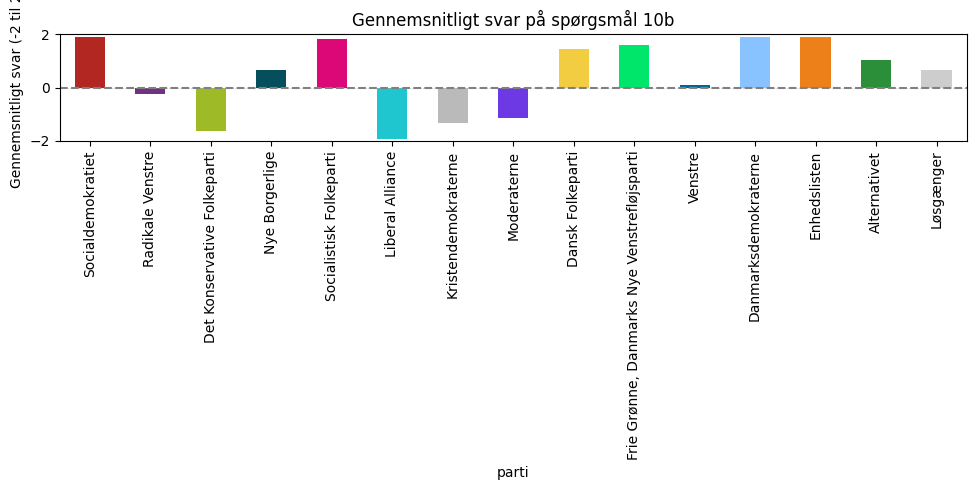

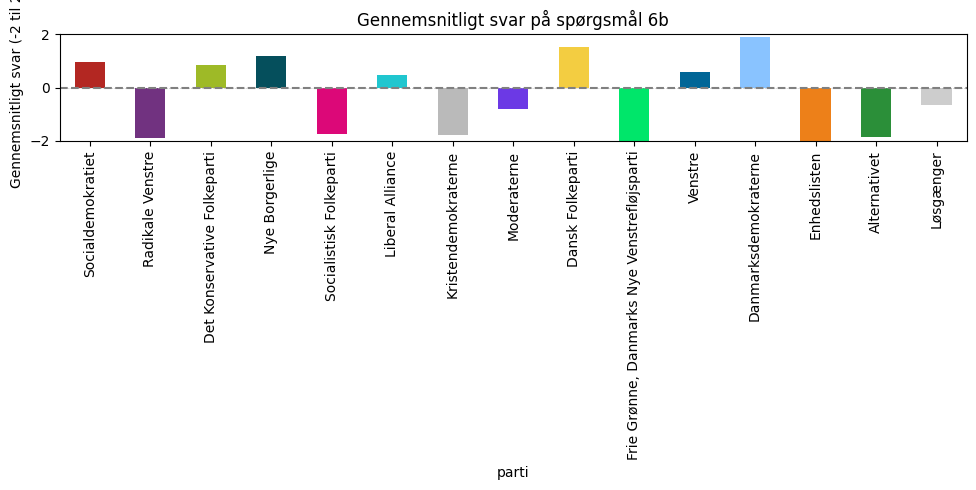

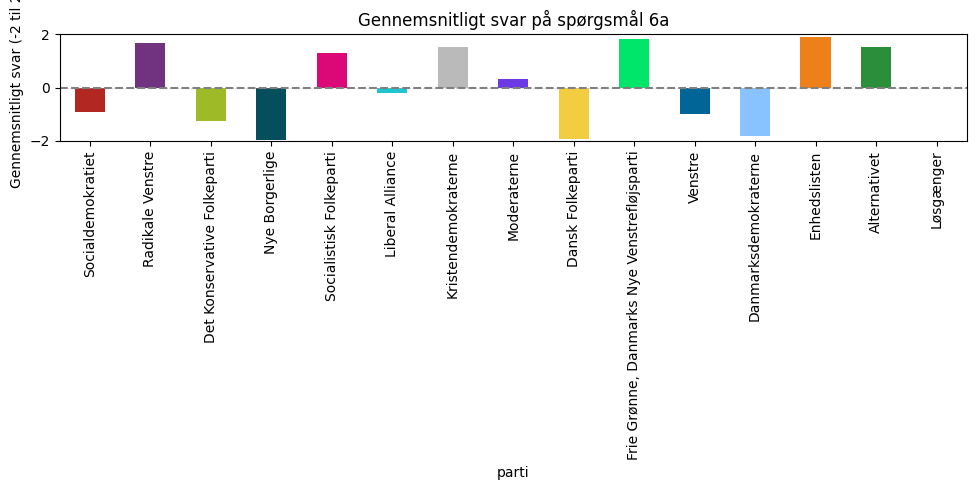

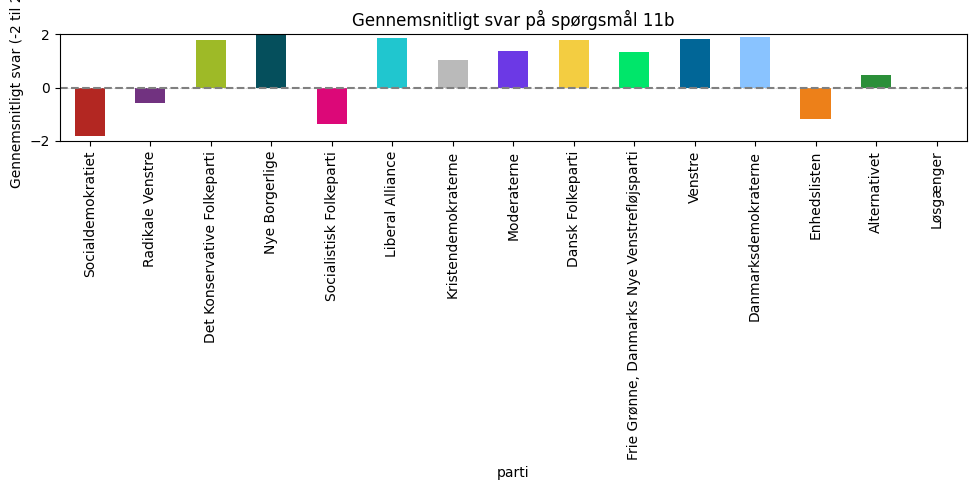

In [34]:
# Grupper data per parti og beregn gennemsnit per spørgsmål
avg_answers = data.groupby("parti")[question_cols].mean()

# Sorter partier politisk
avg_answers = avg_answers.loc[party_colors.keys()]

selected_qs = ["10b", "6b", "6a", "11b"]

for question in selected_qs:
    plt.figure(figsize=(10, 5))
    avg_answers[question].plot(kind="bar", color=[party_colors.get(p, "gray") for p in avg_answers.index])
    plt.title(f"Gennemsnitligt svar på spørgsmål {question}")
    plt.ylabel("Gennemsnitligt svar (-2 til 2)")
    plt.ylim(-2, 2)
    plt.xticks(rotation=90)
    plt.axhline(0, color="gray", linestyle="--")
    plt.grid(True, axis="y", linestyle=":", linewidth=0.5)
    plt.tight_layout()
    plt.show()


Jeg beregnede gennemsnitlige svar pr. spørgsmål for hvert parti. På tværs af flere spørgsmål (6a, 6b, 10b, 11b) ser vi en tydelig skillelinje mellem rød og blå blok. Nogle spørgsmål – som 6a og 6b – fungerer som gode indikatorer for værdipolitisk orientering, mens fx spørgsmål 10b er stærkt fordelingspolitisk. Spørgsmål 11b viser, at også enkeltsager kan differentiere kandidater. Gennemsnitssvarene er derfor en stærk indikator for et partis placering i det politiske landskab.

## Clustering analyse
Formålet med clustering analyseb er at forsøge at gruppere kandidaterne uden at bruge deres parti som label

Formålet er at finde ud af:
- Passer de nuværende partier til den faktiske fordeling af politiske holdninger?
- Er der for mange partier, eller kunne nogle evt. slås sammen?
- Er der kandidater, der ligger “mellem partier”?

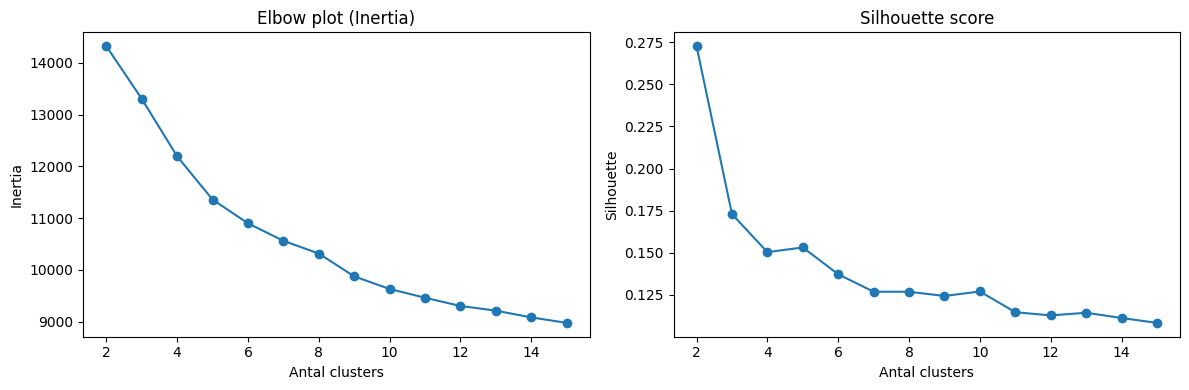

In [35]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Behold kun spørgsmålskolonner og fjern NaNs
cluster_data = data[question_cols].dropna()
cluster_scaled = StandardScaler().fit_transform(cluster_data)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Test forskellige antal k
inertia = []
silhouette = []
k_values = range(2, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(cluster_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(cluster_scaled, labels))

# Plot inertia (elbow) og silhouette
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow plot (Inertia)")
plt.xlabel("Antal clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette, marker='o')
plt.title("Silhouette score")
plt.xlabel("Antal clusters")
plt.ylabel("Silhouette")

plt.tight_layout()
plt.show()


### K-Means

**Elbow Plot (Inertia)**
Viser hvor godt dine klynger passer data – lavere værdi = bedre fit.
Du leder efter "albue-punktet" hvor kurven flader ud → det optimale antal klynger.

I dit plot:
Albuen ligger ca. ved 6–7 klynger, hvorefter forbedringen flader ud → det er et godt valg.

**Silhouette Score**
Måler hvor godt adskilt og samlet dine klynger er (mellem -1 og 1)
Høj score = kandidaterne minder om dem i egen klynge og adskiller sig fra de andre.

I dit plot:
Den højeste score er ved 2, men det er for groft.
Ved 7 er scoren stadig over 0.125, hvilket er ok for politiske holdningsdata.
7–8 klynger giver altså et fornuftigt kompromis.

#### PCA
PCA er en metode til at reducere antallet af dimensioner (spørgsmål) i datasættet – f.eks. fra 40 spørgsmål → til 2 akser.

Den gør det ved at finde de vigtigste mønstre, dvs. retninger i data hvor variationen er størst.
Disse mønstre kaldes hovedkomponenter, her PC1 (første akse) og PC2 (anden akse).

Anvendelse:
- Identificere de vigtigste dimensioner
    - Hver kandidat har måske 30-40 svar (features), men mange af disse svar hænger sammen f.eks. spørgsmål om udlændingepolitik
    - PCA skaber nye komponenter: PC1, den akse hvor data varierer mest (størst spredning), PC2 den næst mest forklarende retning osv. Disse kaldes hovedkomponenter
- Forklare varians
    - "forklaret varians", hvor meget af data sættets struktur, der bevares i komponenten. PC1 forklarer f.eks. 26% af variansen.
- Visualisere data i 2D vha. de vigtigste hovedkomponenter
    - Når vi anvender pca.fit_transform(), får vi et 2D-koordinatsystem, hvor kandidaterne placeres ud fra sine overordnede politiske mønstre.

Hvad betyder tallene på akserne?
- Akserne er matematiske dimensioner skabt ud fra kombinationer af alle spørgsmål.
- En høj værdi på PC1 betyder, at kandidaten havde en bestemt type svarmønster (f.eks. mange +2 på bestemte spørgsmål).
- Negative værdier indikerer det modsatte svarmønster.
- Du skal ikke tolke PC1 = 4 som "højreorienteret" direkte – men forskellen mellem høj og lav på aksen kan ofte repræsentere en ideologisk retning.

#### Centroids
En centroid er midtpunktet af en cluster – den gennemsnitlige position af alle punkter i clusteren i det oprindelige feature space.

KMeans grupperer kandidater med lignende svarmønstre.Hvis et parti ligger samlet omkring ét centroid, betyder det:
→ Partiets kandidater har meget ens svarmønster (intern enighed).
Hvis et parti er spredt over flere klynger, tyder det på interne forskelle (f.eks. Radikale, Alternativet, Socialdemokratiet).

**Hvad fortæller de os?**
- Hvor “gennemsnitskandidaten” i en cluster ligger.
- Om visse clusters er tæt på hinanden eller tydeligt adskilte.
- Om det ser ud som om visse partier overlapper, eller om man burde overveje flere eller færre grupperinger.

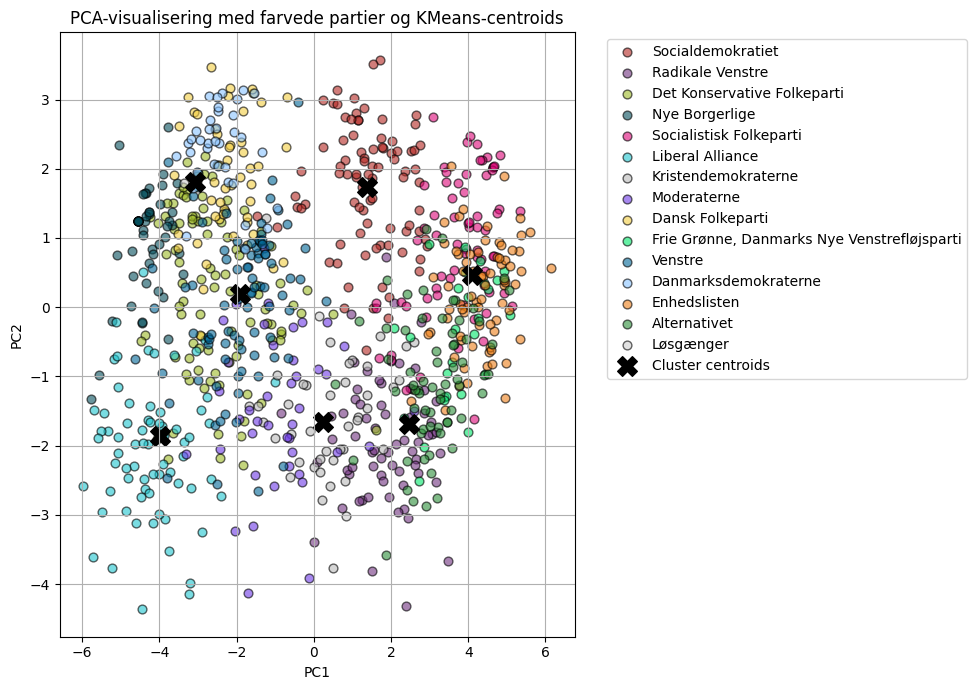

Forklaret varians af PCA-komponenter: [0.38872751 0.11242376]


In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

# Udtræk og skaler kun spørgsmålskolonnerne
data_question_only = data[question_cols].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_question_only)

# Lav en DataFrame med index og kolonnenavne bevaret
data_scaled_df = pd.DataFrame(data_scaled, columns=question_cols, index=data.index)

# PCA til 2 komponenter (for visualisering)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Brug dine KMeans-clusters (fx fra k=7)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Lav DataFrame med labels og farver
viz_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
viz_df["cluster"] = clusters
viz_df["parti"] = data.loc[data_scaled_df.index, "parti"]

# Tegn både kandidater (farvet efter parti) og centroids (sort X)
plt.figure(figsize=(10, 7))

# Kandidater
for party, color in party_colors.items():
    mask = viz_df["parti"] == party
    plt.scatter(viz_df.loc[mask, "PC1"], viz_df.loc[mask, "PC2"],
                label=party, color=color, alpha=0.6, edgecolor="k", s=40)

# Centroids (fra KMeans)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='black', s=200, marker='X', label='Cluster centroids')

plt.title("PCA-visualisering med farvede partier og KMeans-centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

print("Forklaret varians af PCA-komponenter:", pca.explained_variance_ratio_)

#### Analyse af PCA med farvede partier og centroids

**Forklaret varians**
Forklaret varians af PCA-komponenter: [0.3887, 0.1124]
- PC1 forklarer ~39% af al variation i kandidaternes politiske svar
- PC2 forklarer ~11%

- Dvs. 50% af al information er presset ned på en 2D-visualisering. Det er helt fint til analyseformål, men viser også at meget information gemmer sig i flere dimensioner, som vi ikke kan se.

**Partifarver og fordeling**
Du har farvet kandidaterne efter deres faktiske parti – og her ses:
- Partier med tydeligt ideologisk ståsted (som Enhedslisten, Nye Borgerlige, Liberal Alliance) klumper sig sammen i nogle områder
- Partier som Moderaterne og Socialdemokratiet er mere spredt ud – det peger på mere intern variation
- Der er overlap mellem fx Venstre, Konservative og Danmarksdemokraterne → disse kandidater har lignende profiler i testbesvarelser

**Cluster-centroids**
- Dine store X’er viser midtpunkterne for de 7 KMeans-klynger:
- De ligger godt spredt og centret i tæt befolkede områder – det er et sundhedstegn
- Ét centroid er meget tæt på rød blok (Enhedslisten, SF)
- Ét andet ligger i det liberale/borgerlige hjørne
- Et tredje midt i Socialdemokratiets område – måske midterpolitikere
- Du har også centroids i periferien, der fanger kandidater med ekstreme eller atypiske svar

**Tolkning og pointer til eksamen**
- PCA hjælper os visualisere 40+ spørgsmål i 2D → gør mønstre og grupper synlige
- KMeans centroids viser hvor de typiske grupper af svar er centreret
- Vi ser nogle partier klumper sig naturligt sammen – andre er spredt (fx Moderaterne), hvilket bekræfter dine resultater fra interne uenighedsanalyser
- Nogle klynger stemmer godt overens med partier – andre er på tværs af partiskel → her kan du diskutere om vi har for mange eller for få partier

#### Tolkning
Jeg har brugt PCA til at reducere alle kandidatsvar ned til 2 dimensioner (PC1 og PC2), som fanger de vigtigste forskelle i svarmønstre. Hver kandidat er et punkt, farvet efter parti. KMeans-clustering er anvendt til at finde 7 grupper med lignende politiske holdninger, som jeg har markeret med hvide centroids. Jeg kan se at visse partier – som Nye Borgerlige – er meget samlet, mens fx Socialdemokratiet og Alternativet er mere spredt, hvilket tyder på større intern variation i politiske holdninger

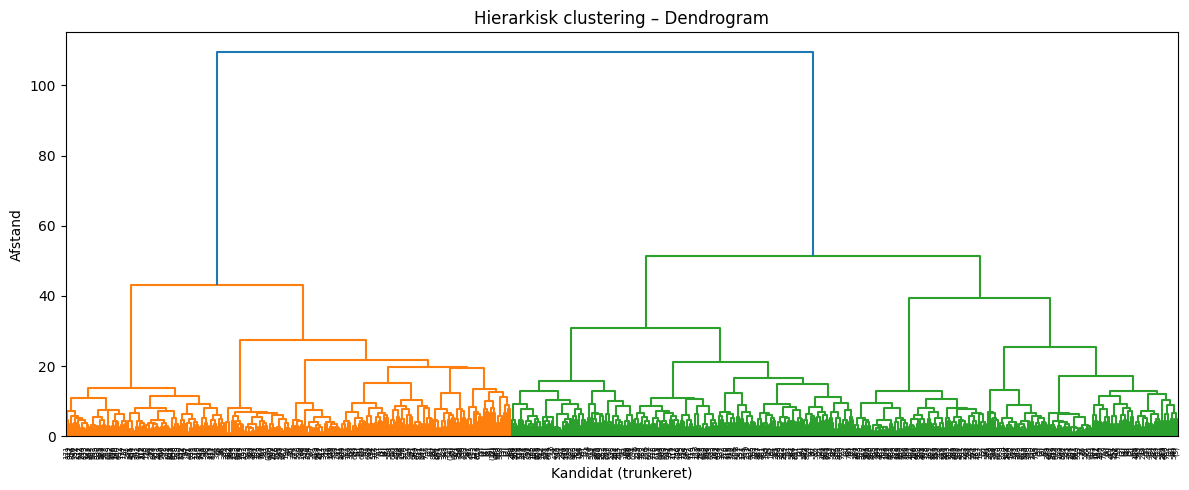

Antal fundne klynger: 7
Antal støj-kandidater: 739


In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 5))
linked = linkage(cluster_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=10)
plt.title("Hierarkisk clustering – Dendrogram")
plt.xlabel("Kandidat (trunkeret)")
plt.ylabel("Afstand")
plt.tight_layout()
plt.show()

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=5)
labels = db.fit_predict(cluster_scaled)

# Antal unikke klynger (inkl. -1 = støj)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Antal fundne klynger: {n_clusters}")
print(f"Antal støj-kandidater: {n_noise}")

#### Hierarkisk clustering (dendrogram)
Viser hvordan kandidater gradvist samles i grupper efter hvor ens de er.

Hver forgrening viser et “merge” – og store lodrette spring = adskilte klynger.

I dit dendrogram:
Der er et meget tydeligt “højt spring” mellem 6–8 store grupper.
Det stemmer med K-Means!

#### DBSCAN-resultat (tekst)
Antal fundne klynger: 7
Antal støj-kandidater: 739
DBSCAN forsøger at finde tætte grupper uden at vælge antal på forhånd.

Her fandt den 7 grupper = flot!
Men 739 støj-kandidater betyder, at mange kandidater ligger for spredt til at passe ind i en tæt klynge.

Det siger noget om at det politiske landskab er ret glidende og komplekst.

#### Tolkning

Jeg undersøgte hvor mange naturlige politiske “grupper” der findes i data, baseret på kandidaters besvarelser.
Alle tre metoder — K-Means, Hierarkisk clustering og DBSCAN — peger på omkring 7 naturlige klynger.
Det stemmer ikke helt med antallet af partier i Folketinget (som er højere), hvilket kan antyde at nogle partier overlapper, eller at politiske holdninger ikke altid er så tydeligt adskilte.

DBSCAN fandt 7 grupper, men også hele 739 kandidater som “støj”, hvilket antyder at mange politikere befinder sig i mere glidende zoner – måske fordi de ikke følger partilinjen fuldt ud, eller fordi partierne har stor intern variation.

Fund:
- Optimal k i området 6–8
- Der er flere partier i virkeligheden, hvilket tyder på overlap og mulighed for sammenlægning
- DBSCAN viste mange støjkandidater, hvilket tyder på at nogle kandidater ikke passer perfekt i nogen klynge

Konklusion: der er grundlag for at reducere antallet af partier, eller i hvert fald stille spørgsmålstegn ved hvor homogene de enkelte partier er

In [38]:
# 1. Indlæs de valgte kandidater
elected = pd.read_excel("electeddata.xlsx")

# 2. Filtrér ned til kun spørgsmålskolonner
elected_q = elected[question_cols].copy()

# 3. Fjern kandidater med for mange NaNs og udfyld resten
elected_q_clean = elected_q.dropna(thresh=len(question_cols) * 0.8).fillna(0)

# 4. Tilføj partierne igen til analysen
elected_parties = elected.loc[elected_q_clean.index, "parti"]

# 5. Beregn parvise afstande (f.eks. Manhattan eller cosine)
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(elected_q_clean, metric="cosine")

#### Analyse
- Find par med størst afstand = mest uenige kandidater
- Beregn gennemsnitlig afstand indenfor hvert parti = intern uenighed
- Heatmap eller distance-matrix mellem partier (middelværdi)

Mest enige kandidater:
- Kim Edberg (Nye Borgerlige)
- Pernille Vermund (Nye Borgerlige)
Cosine-afstand: 0.000

Mest uenige kandidater:
- Mai Villadsen (Enhedslisten)
- Steffen Larsen (Liberal Alliance)
Cosine-afstand: 1.802


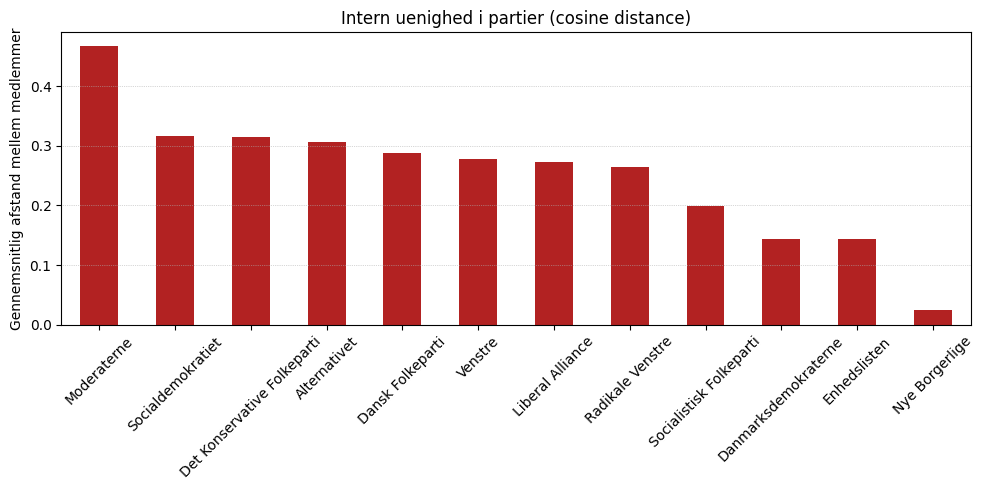

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Indlæs de valgte kandidater
elected = pd.read_excel("electeddata.xlsx")

# 2. Udtræk spørgsmålskolonner
question_cols = [col for col in elected.columns if isinstance(col, (int, np.integer)) or (isinstance(col, str) and col.strip().endswith(('a', 'b')) and col[0].isdigit())]
elected_q = elected[question_cols].copy()

# 3. Fjern kandidater med mange NaN og udfyld resten med 0
elected_q_clean = elected_q.dropna(thresh=len(question_cols) * 0.8).fillna(0)

# 4. Hent partier
elected_parties = elected.loc[elected_q_clean.index, "parti"]
elected_names = elected.loc[elected_q_clean.index, "navn"]
# 5. Beregn cosine-afstande mellem kandidater
dist_matrix = pairwise_distances(elected_q_clean, metric="cosine")

# 6. Find mest enige og mest uenige par
np.fill_diagonal(dist_matrix, np.nan)  # Ignorer selv-afstand
min_dist_idx = np.unravel_index(np.nanargmin(dist_matrix), dist_matrix.shape)
max_dist_idx = np.unravel_index(np.nanargmax(dist_matrix), dist_matrix.shape)

print("Mest enige kandidater:")
print(f"- {elected_names.iloc[min_dist_idx[0]]} ({elected_parties.iloc[min_dist_idx[0]]})")
print(f"- {elected_names.iloc[min_dist_idx[1]]} ({elected_parties.iloc[min_dist_idx[1]]})")
print(f"Cosine-afstand: {dist_matrix[min_dist_idx]:.3f}\n")

print("Mest uenige kandidater:")
print(f"- {elected_names.iloc[max_dist_idx[0]]} ({elected_parties.iloc[max_dist_idx[0]]})")
print(f"- {elected_names.iloc[max_dist_idx[1]]} ({elected_parties.iloc[max_dist_idx[1]]})")
print(f"Cosine-afstand: {dist_matrix[max_dist_idx]:.3f}")

# 7. Intern uenighed i partier (gennemsnitlig afstand indenfor hvert parti)
party_distances = {}
for party in elected_parties.unique():
    idx = elected_parties[elected_parties == party].index
    if len(idx) > 1:
        party_matrix = dist_matrix[np.ix_(idx, idx)]
        upper_triangle = party_matrix[np.triu_indices_from(party_matrix, k=1)]
        party_distances[party] = np.nanmean(upper_triangle)

# Sortér og vis
party_disagreement = pd.Series(party_distances).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
party_disagreement.plot(kind="bar", color="firebrick")
plt.title("Intern uenighed i partier (cosine distance)")
plt.ylabel("Gennemsnitlig afstand mellem medlemmer")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle=":", linewidth=0.5)
plt.tight_layout()
plt.show()


#### Politisk landskab blandt valgte kandidater

**Mest enige kandidater:**
Kim Edberg og Pernille Vermund (Nye Borgerlige)
Cosine-afstand: 0.000

Disse to kandidater svarer fuldstændig identisk på alle spørgsmål. Det kan indikere:
- En meget fast partilinje i Nye Borgerlige
- At Vermund som partistifter har sat en tydelig kurs, og Edberg følger den 100 %

**Mest uenige kandidater:**
Mai Villadsen (Enhedslisten) vs. Steffen Larsen (Liberal Alliance)
Cosine-afstand: 1.802

Dette er nær den maksimale afstand, og det giver god mening:
- Mai Villadsen står for meget venstreorienteret fordelingspolitik, grøn omstilling, og stram kritik af privat profit.
- Steffen Larsen står for klassisk liberal frihed og minimalstat.

De repræsenterer i praksis hver sin ideologiske pol i det politiske landskab.

**Intern uenighed i partier (gennemsnitlig afstand)**

Mest uenige partier:
- Moderaterne: Høj intern afstand. Partiet er nyt og favner bredt, mange tidligere medlemmer fra V, R, K, S – giver naturligt uens svar.
- Socialdemokratiet: Stor intern spredning kan skyldes skillelinje mellem klassisk arbejderlinje og nyere reformlinje.
- Det Konservative Folkeparti: Muligvis uenighed om retning ifm. økonomi og klima.

Mest enige partier:
- Nye Borgerlige: Meget lav intern afstand → stærk ideologisk kerne.
- Danmarksdemokraterne & Enhedslisten: Relativt lav uenighed → muligvis pga. nyhed (DD) eller stærk partilinje (EL).

**Konklusion**
Jeg undersøgte de valgte kandidaters besvarelser for at finde, hvem der ligner hinanden mest og mindst, og hvor stor intern uenighed der findes i hvert parti.

Nye Borgerlige har ekstremt lav intern variation, mens fx Moderaterne og Socialdemokratiet har høj. Det giver mening, da Moderaterne er et nyt parti med medlemmer fra mange tidligere partier.

Jeg fandt også at de mest uenige kandidater var Mai Villadsen og Steffen Larsen – hvilket matcher deres ideologiske placering. Det viser, at denne metode giver indsigt i både intern sammenhæng og politisk polarisering.

Min tilgang til analysen
Jeg har struktureret min tilgang efter en typisk machine learning-pipeline, selvom dette er mere en eksplorativ analyse end et klassisk supervised learning-problem.

1. Dataindsamling og indlæsning
Jeg indlæste alldata.xlsx og electeddata.xlsx, samt tilhørende spørgeskemaer.
De forskellige filer blev sammensat og analyseret både samlet og separat (TV2/DR).

2. Dataforbehandling (preprocessing)
- Fjernelse af NaNs: Ved analyse blev rækker med mange manglende svar enten droppet eller udfyldt.
- Normalisering: Ved clustering og afstandsmål blev data skaleret med StandardScaler.
- Kodning: Svar blev fastholdt som (-2, -1, 0, 1, 2), da de allerede var numeriske og havde semantisk betydning.

3. Explorativ analyse og nøgleindsigter
- Standardafvigelse pr. spørgsmål for at finde de mest polariserende spørgsmål
- Gennemsnitlige svar pr. parti pr. spørgsmål for at forstå partimæssige skillelinjer
- Visualiseringer med farvekoder for partier

4. Clustering og politisk landskab
- Jeg benyttede K-Means, Hierarkisk clustering og DBSCAN.
- K-means viste, at ~7 klynger passer godt til data.
- DBSCAN viste, at mange kandidater ikke passer naturligt ind i nogen klynge (støj).

5. Analyse af valgte kandidater
Jeg målte parvise afstande mellem kandidater for at finde:
- Hvem der er mest enige (typisk i små ideologisk faste partier)
- Hvem der er mest uenige (tværs af fløje)
- Hvilke partier har mest intern uenighed

6. Valide metrikker og refleksion
- Jeg brugte cosine-afstand til at måle ideologisk afstand, da det fokuserer på retning frem for absolut forskel.
- Jeg kunne evt. have suppleret med PCA for at visualisere 2D placeringer.
- En alternativ analyse kunne være at træne en model til at forudsige partitilhørsforhold ud fra testsvar (fx med beslutningstræer eller Random Forests) – det ville vise hvor adskillelige partierne er i praksis.

